In [1]:
import ee
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import agrigee_lite as agl

np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
ee.Initialize(opt_url="https://earthengine-highvolume.googleapis.com", project="ee-paulagibrim")

In [4]:
agl.get_all_tasks()

,attempt,create_time,description,destination_uris,done,end_time,name,priority,progress,script_uri,start_time,state,total_batch_eecu_usage_seconds,type,update_time,estimated_cost_usd_tier_1,estimated_cost_usd_tier_2,estimated_cost_usd_tier_3
0,1,2025-04-09 14:30:47.543693+00:00,download_720_samples,https://drive.google.com/#folders/1Svmr-eQvig1...,True,2025-04-09 15:19:43.152439+00:00,projects/ee-paulagibrim/operations/D2OS2JVGESB...,100,None,None,2025-04-09 14:30:59.056455+00:00,SUCCEEDED,1528.78,EXPORT_FEATURES,2025-04-09 15:19:43.152439+00:00,0.17,0.12,0.07


In [5]:
gdf = gpd.read_parquet("california_with_crop_names.parquet")
gdf = gdf[gdf.year>=2019].reset_index(drop=True)

In [6]:
satellite = agl.sat.Sentinel2(use_sr=True)

In [8]:
row = gdf.iloc[0]

imgs = agl.get.multiple_images_multithread(row.geometry, row.start_date, row.end_date, satellite)

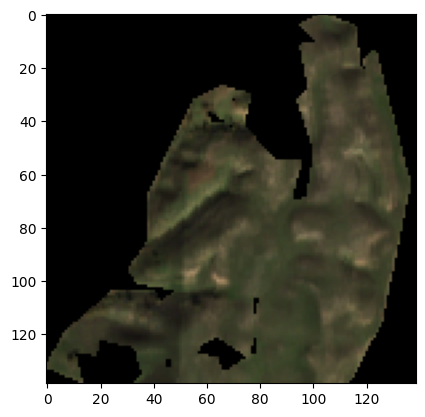

In [11]:
plt.imshow((imgs[0][:,:,[2,1,0]]/10000) * np.pi)

In [12]:
sits = agl.get.single_sits(row.geometry, row.start_date, row.end_date, satellite)

In [13]:
sits

,01_doy,11_blue,12_green,13_red,14_re1,15_re2,16_re3,17_nir,18_re4,19_swir1,20_swir2
0,2,555,826,821,1343,1901,2041,2188,2204,2814,2011
1,7,916,1243,1108,1841,2728,2888,2948,3101,2910,1794
2,27,610,939,813,1446,2396,2556,2694,2715,2714,1781
3,37,425,806,589,1330,2486,2649,2841,2838,2436,1430
4,42,414,730,573,1294,2330,2510,2715,2667,2283,1406
5,72,493,850,670,1391,2669,2917,3163,3128,2452,1476
6,77,420,781,613,1361,2659,2893,3021,3115,2382,1389
7,87,369,737,510,1276,2690,2924,3140,3140,1899,1019
8,97,374,715,529,1271,2684,2948,3068,3199,2031,1132
9,102,607,910,759,1524,2837,3164,3386,3424,2140,1275
